# Capstone Project Notebook
## Downloading Data and Import the Needed Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df=pd.read_csv('US_Accidents_June20.csv')
df.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

## Data Cleaning 
As the data is very large, I had to limit the data to only 10000 rows. Then, dropped the unwanted colums, replaced the NaN values with the mean for some columns, and deleted the NaN values from some other columns

In [3]:
limit=10000
df=df[:limit]

In [4]:
df.drop(['End_Lat', 'End_Lng', 'Source', 'TMC', 'Number'], axis=1, inplace=True)
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street Side  ... Roundabout Station   Stop  \
0                     I-70 E    R  ...      False   False  False   
1                   Brice Rd    L  ...      False   False  False   
2             State Route 32    R  ...      False   False  False   
3                     I-75 S    R  ...      False   False  False   
4  Miamisburg Centerville Rd    R  ...      False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

   Nautical_Twilight  Astronomical_Twilight  
0              Night                  Night  
1              Night                    Day  
2                Day                    Day  
3                Day                    Day  
4                Day                    Day  

[5 rows x 44 columns]

In [5]:
missing_data=df.isnull()
missing_data.head()

ID  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  False     False       False     False      False      False         False   
1  False     False       False     False      False      False         False   
2  False     False       False     False      False      False         False   
3  False     False       False     False      False      False         False   
4  False     False       False     False      False      False         False   

   Description  Street   Side  ...  Roundabout  Station   Stop  \
0        False   False  False  ...       False    False  False   
1        False   False  False  ...       False    False  False   
2        False   False  False  ...       False    False  False   
3        False   False  False  ...       False    False  False   
4        False   False  False  ...       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0            False           False         False           False   
1            False           False         False           False   
2            False           False         False           False   
3            False           False         False           False   
4            False           False         False           False   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  
0           False              False                  False  
1           False              False                  False  
2           False              False                  False  
3           False              False                  False  
4           False              False                  False  

[5 rows x 44 columns]

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

ID
False    10000
Name: ID, dtype: int64

Severity
False    10000
Name: Severity, dtype: int64

Start_Time
False    10000
Name: Start_Time, dtype: int64

End_Time
False    10000
Name: End_Time, dtype: int64

Start_Lat
False    10000
Name: Start_Lat, dtype: int64

Start_Lng
False    10000
Name: Start_Lng, dtype: int64

Distance(mi)
False    10000
Name: Distance(mi), dtype: int64

Description
False    10000
Name: Description, dtype: int64

Street
False    10000
Name: Street, dtype: int64

Side
False    10000
Name: Side, dtype: int64

City
False    10000
Name: City, dtype: int64

County
False    10000
Name: County, dtype: int64

State
False    10000
Name: State, dtype: int64

Zipcode
False    9999
True        1
Name: Zipcode, dtype: int64

Country
False    10000
Name: Country, dtype: int64

Timezone
False    9999
True        1
Name: Timezone, dtype: int64

Airport_Code
False    9999
True        1
Name: Airport_Code, dtype: int64

Weather_Timestamp
False    9969
True       31
Name: Weather

In [7]:
Temp_mean = df["Temperature(F)"].astype("float").mean(axis=0)
print("Average of Temperature:", Temp_mean)
Wind_Chill_mean = df["Wind_Chill(F)"].astype("float").mean(axis=0)
print("Average of wind chill:", Wind_Chill_mean)
Humid_mean = df["Humidity(%)"].astype("float").mean(axis=0)
print("Average of Humidity:", Humid_mean)
Pressure_mean = df["Pressure(in)"].astype("float").mean(axis=0)
print("Average of pressure:", Pressure_mean)
Vis_mean = df["Visibility(mi)"].astype("float").mean(axis=0)
print("Average of visibility:", Vis_mean)
Wind_Speed_mean = df["Wind_Speed(mph)"].astype("float").mean(axis=0)
print("Average of wind speed:", Wind_Speed_mean)
Precip_mean = df["Precipitation(in)"].astype("float").mean(axis=0)
print("Average of precipitation:", Precip_mean)

Average of Temperature: 59.64373171961674
Average of wind chill: 33.126157082748946
Average of Humidity: 64.08313082219522
Average of pressure: 30.012504766683392
Average of visibility: 8.914297253634896
Average of wind speed: 8.860527595429128
Average of precipitation: 0.02772039180765806


In [8]:
df['Temperature(F)'].replace(np.nan, Temp_mean, inplace=True)
df['Wind_Chill(F)'].replace(np.nan, Wind_Chill_mean, inplace=True)
df['Humidity(%)'].replace(np.nan, Humid_mean, inplace=True)
df['Pressure(in)'].replace(np.nan, Pressure_mean, inplace=True)
df['Visibility(mi)'].replace(np.nan, Vis_mean, inplace=True)
df['Wind_Speed(mph)'].replace(np.nan, Wind_Speed_mean, inplace=True)
df['Precipitation(in)'].replace(np.nan, Precip_mean, inplace=True)

In [9]:
df.dropna(subset=["Weather_Condition", "Sunrise_Sunset", "Civil_Twilight", "Wind_Direction", "Nautical_Twilight", "Astronomical_Twilight"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis 
I used the correlation function to get the correlation between the attributes. Stop, Crossing, Junction, and Traffic_Signal were the highest values. However, the values are very small. That's why I used Pearson's correlation as well, but it gave me similar low values, so I'll be going with the abovementioned attributes

In [10]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed and imported!


In [11]:
US_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
Accident = folium.map.FeatureGroup()


for lat, lng, in zip(df.Start_Lat, df.Start_Lng):
    Accident.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


US_map.add_child(Accident)

In [13]:
df.corr()

Severity  Start_Lat  Start_Lng  Distance(mi)  \
Severity           1.000000  -0.065381  -0.045735     -0.006509   
Start_Lat         -0.065381   1.000000   0.694965      0.000085   
Start_Lng         -0.045735   0.694965   1.000000      0.018564   
Distance(mi)      -0.006509   0.000085   0.018564      1.000000   
Temperature(F)     0.022883  -0.179032  -0.326872     -0.037306   
Wind_Chill(F)     -0.026502  -0.326068  -0.447656     -0.007964   
Humidity(%)       -0.029309   0.015892   0.124048      0.022834   
Pressure(in)      -0.028802  -0.041077  -0.032367      0.012253   
Visibility(mi)     0.057952  -0.220225  -0.188517     -0.008728   
Wind_Speed(mph)    0.063348   0.032659   0.068913     -0.006828   
Precipitation(in)  0.004357   0.020455  -0.027355      0.030494   
Amenity           -0.079553  -0.013243   0.005022     -0.003849   
Bump               0.003018   0.001276  -0.003883     -0.000579   
Crossing          -0.151068  -0.010522   0.019256      0.006542   
Give_Way          -0.031317  -0.039403  -0.011832     -0.001619   
Junction           0.161939  -0.083084  -0.085394     -0.005347   
No_Exit            0.034938  -0.030600  -0.008446     -0.001336   
Railway           -0.037757  -0.032093  -0.025350      0.025089   
Roundabout        -0.008080  -0.008774  -0.003190     -0.000535   
Station           -0.057223  -0.045245   0.007180     -0.003444   
Stop              -0.125734  -0.013313  -0.038072      0.028023   
Traffic_Calming   -0.008934  -0.015637  -0.006603     -0.000859   
Traffic_Signal    -0.181743   0.092584   0.104212     -0.011437   
Turning_Loop            NaN        NaN        NaN           NaN   

                   Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Severity                 0.022883      -0.026502    -0.029309     -0.028802   
Start_Lat               -0.179032      -0.326068     0.015892     -0.041077   
Start_Lng               -0.326872      -0.447656     0.124048     -0.032367   
Distance(mi)            -0.037306      -0.007964     0.022834      0.012253   
Temperature(F)           1.000000       0.172444    -0.780235     -0.234264   
Wind_Chill(F)            0.172444       1.000000    -0.016197      0.011656   
Humidity(%)             -0.780235      -0.016197     1.000000      0.092811   
Pressure(in)            -0.234264       0.011656     0.092811      1.000000   
Visibility(mi)           0.294209       0.153442    -0.450732      0.028318   
Wind_Speed(mph)          0.096963      -0.125109    -0.056013     -0.129431   
Precipitation(in)        0.020239       0.064960     0.034156     -0.064042   
Amenity                 -0.018915      -0.012543     0.018980      0.008618   
Bump                    -0.002270       0.000008     0.003424      0.005029   
Crossing                -0.003218       0.006166     0.001151      0.007265   
Give_Way                -0.009132       0.006058     0.015981      0.004744   
Junction                 0.018712       0.014156    -0.000141      0.000691   
No_Exit                  0.016580       0.000016    -0.015726     -0.001245   
Railway                  0.001141       0.011480    -0.002928      0.001819   
Roundabout               0.007981       0.000006     0.002009     -0.000401   
Station                 -0.025283      -0.006448     0.020735      0.006072   
Stop                     0.019026       0.027575    -0.012441      0.009642   
Traffic_Calming         -0.007619       0.000013     0.012231      0.002785   
Traffic_Signal          -0.015915      -0.014310    -0.018905      0.012793   
Turning_Loop                  NaN            NaN          NaN           NaN   

                   Visibility(mi)  Wind_Speed(mph)  ...  Give_Way  Junction  \
Severity                 0.057952         0.063348  ... -0.031317  0.161939   
Start_Lat               -0.220225         0.032659  ... -0.039403 -0.083084   
Start_Lng               -0.188517         0.068913  ... -0.011832 -0.085394   
Distance(mi)            -0.008728        -0.006828 

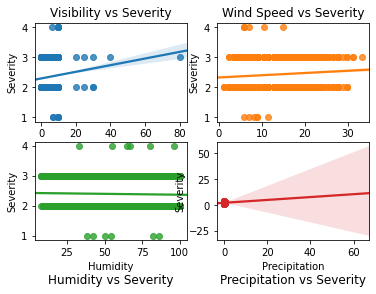

In [12]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)

sns.regplot(x='Visibility(mi)', y='Severity', data=df, ax=ax0) 
ax0.set_title('Visibility vs Severity')
ax0.set_xlabel('Visibility')
ax0.set_ylabel('Severity')

sns.regplot(x='Wind_Speed(mph)', y='Severity', data=df, ax=ax1) 
ax1.set_title('Wind Speed vs Severity')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Severity')

sns.regplot(x='Humidity(%)', y='Severity', data=df, ax=ax2) 
ax2.set_title('Humidity vs Severity', y=-0.5)
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Severity')

sns.regplot(x='Precipitation(in)', y='Severity', data=df, ax=ax3) 
ax3.set_title('Precipitation vs Severity', y=-0.5)
ax3.set_xlabel('Precipitation')
ax3.set_ylabel('Severity')


plt.show()


In [14]:
from scipy import stats
pearson_coef1, p_value1= stats.pearsonr(df['Crossing'], df['Severity'])
print('The Pearson coeffcient for crossing is:', pearson_coef1)
print('The p vaue for crossing is:', p_value1)
pearson_coef2, p_value2= stats.pearsonr(df['Stop'], df['Severity'])
print('The Pearson coeffcient for Stop is:', pearson_coef2)
print('The p vaue for Stop is:', p_value2)
pearson_coef3, p_value3= stats.pearsonr(df['Junction'], df['Severity'])
print('The Pearson coeffcient for Junction is:', pearson_coef3)
print('The p vaue for Junction is:', p_value3)
pearson_coef4, p_value4= stats.pearsonr(df['Traffic_Signal'], df['Severity'])
print('The Pearson coeffcient for Traffic Signal is:', pearson_coef4)
print('The p vaue for Traffic Signal is:', p_value4)

The Pearson coeffcient for crossing is: -0.15106750284227774
The p vaue for crossing is: 9.736740148665325e-52
The Pearson coeffcient for Stop is: -0.12573441171343328
The p vaue for Stop is: 2.9615093527284486e-36
The Pearson coeffcient for Junction is: 0.16193890648105094
The p vaue for Junction is: 2.7760442239802622e-59
The Pearson coeffcient for Traffic Signal is: -0.18174340579666
The p vaue for Traffic Signal is: 1.91701963712533e-74


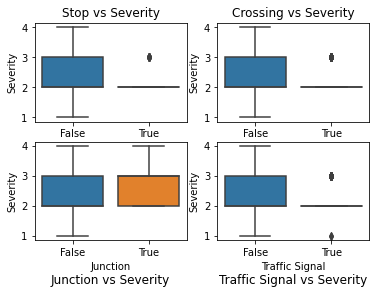

<Figure size 1440x720 with 0 Axes>

In [15]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)

sns.boxplot(x='Stop', y='Severity', data=df, ax=ax0) 
ax0.set_title('Stop vs Severity')
ax0.set_xlabel('Stop')
ax0.set_ylabel('Severity')

sns.boxplot(x='Crossing', y='Severity', data=df, ax=ax1) 
ax1.set_title('Crossing vs Severity')
ax1.set_xlabel('Crossing')
ax1.set_ylabel('Severity')

sns.boxplot(x='Junction', y='Severity', data=df, ax=ax2) 
ax2.set_title('Junction vs Severity', y=-0.5)
ax2.set_xlabel('Junction')
ax2.set_ylabel('Severity')

sns.boxplot(x='Traffic_Signal', y='Severity', data=df, ax=ax3) 
ax3.set_title('Traffic Signal vs Severity', y=-0.5)
ax3.set_xlabel('Traffic Signal')
ax3.set_ylabel('Severity')

plt.figure(figsize=(20, 10))
plt.show()



## Model Development and Evaluation
I used different classification techniques (K nearest neighbor, Decision Tree, Logistic Regression, Support Vector Machine). I used the train test split and used 10% of the data for testing. Then, I used different evaluation techniques (jaccard similarity score, f1 score, accuraacy score)  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Boolean Attributes

In [17]:
y_data=df['Severity']
x_data=df[['Stop', 'Crossing', 'Traffic_Signal', 'Junction']].values

In [18]:

x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.1, random_state=0)


In [19]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
for n in range(1, ks):
    neigh=KNeighborsClassifier(n_neighbors=n). fit(x_train, y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=np.mean(yhat==y_test)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.59818731, 0.63645519, 0.59818731, 0.56495468, 0.56495468,
       0.56495468, 0.56495468, 0.60322256, 0.60322256])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creati

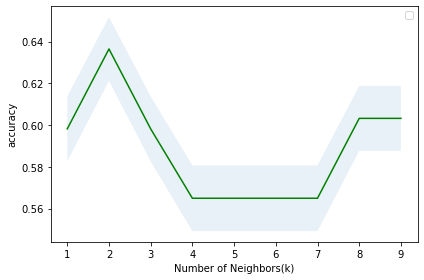

In [20]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.1)
plt.legend('accuracy', '+/-3xstd')
plt.ylabel('accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6364551863041289 with k= 2


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x_train, y_train)
treehat=tree.predict(x_test)
print('decision tree accuracy:', metrics.accuracy_score(y_test, treehat))

decision tree accuracy: 0.6364551863041289


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score, log_loss, f1_score

In [25]:
LR=LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
yhat2=LR.predict(x_test)
yhat2_prob=LR.predict_proba(x_test)
print('Jaccard similarity score:', jaccard_similarity_score(y_test, yhat2))

Jaccard similarity score: 0.6032225579053374


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
from sklearn import svm

In [27]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
yhat3=clf.predict(x_test)
print('Jaccard similarity score:', jaccard_similarity_score(y_test, yhat3))
print('f1 score:', f1_score(y_test, yhat2, average='weighted'))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Jaccard similarity score: 0.6354481369587109
f1 score: 0.45393255299660445


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Numerical Attributes

In [28]:
y_data2=df['Severity']
x_data2=df[['Wind_Speed(mph)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']].values

In [29]:

x_train2, x_test2, y_train2, y_test2=train_test_split(x_data2, y_data2, test_size=0.1, random_state=0)


In [30]:
k=10
mean_acc=np.zeros((k-1))
std_acc=np.zeros((k-1))
for n in range(1, k):
    neigh=KNeighborsClassifier(n_neighbors=n). fit(x_train2, y_train2)
    new_yhat=neigh.predict(x_test2)
    mean_acc[n-1]=np.mean(new_yhat==y_test2)
    std_acc[n-1]=np.std(new_yhat==y_test2)/np.sqrt(new_yhat.shape[0])
    
mean_acc

array([0.56193353, 0.58811682, 0.55287009, 0.58509567, 0.55287009,
       0.58509567, 0.54682779, 0.56898288, 0.57905337])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creati

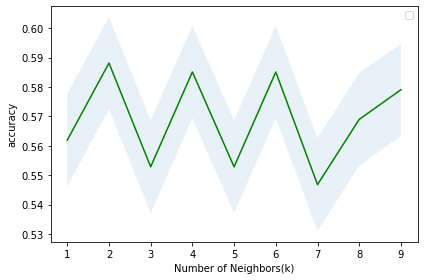

In [31]:
plt.plot(range(1, k), mean_acc, 'g')
plt.fill_between(range(1, k), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.1)
plt.legend('accuracy', '+/-3xstd')
plt.ylabel('accuracy')
plt.xlabel('Number of Neighbors(k)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5881168177240684 with k= 2


In [33]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x_train2, y_train2)
new_treehat=tree.predict(x_test2)
print('decision tree accuracy:', metrics.accuracy_score(y_test2, new_treehat))

decision tree accuracy: 0.6102719033232629


In [34]:
LR=LogisticRegression(C=0.01, solver='liblinear').fit(x_train2, y_train2)
new_yhat2=LR.predict(x_test2)
new_yhat2_prob=LR.predict_proba(x_test2)
print('Jaccard similarity score:', jaccard_similarity_score(y_test2, new_yhat2))

Jaccard similarity score: 0.6042296072507553


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train2, y_train2)
new_yhat3=clf.predict(x_test2)
print('Jaccard similarity score:', jaccard_similarity_score(y_test2, new_yhat3))
print('f1 score:', f1_score(y_test2, new_yhat2, average='weighted'))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Jaccard similarity score: 0.5891238670694864
f1 score: 0.4562268654331404


In [37]:
j1_B=jaccard_similarity_score(y_test, yhat)
print('jaccard similarity score for K nearest Neighbors for Boolean Attributes', j1_B)
j1_N=jaccard_similarity_score(y_test2, new_yhat)
print('jaccard similarity score for K nearest Neighbors for Numerical Attributes', j1_N)
j2_B=jaccard_similarity_score(y_test, treehat)
print('jaccard similarity score for Decision Tree for the Boolean Attrbutes', j2_B)
j2_N=jaccard_similarity_score(y_test2, new_treehat)
print('jaccard similarity score for Decision Tree for the Numerical Attrbutes', j2_N)
j3_B=jaccard_similarity_score(y_test, yhat3)
print('jaccard similarity score for SVM for the Boolean Attributes', j3_B)
j3_N=jaccard_similarity_score(y_test2, new_yhat3)
print('jaccard similarity score for SVM for the Numerical Attributes', j3_N)
j4_B=jaccard_similarity_score(y_test, yhat2)
print('jaccard similarity score for Logistic Regression for the Boolean Attributes', j4_B)
j4_N=jaccard_similarity_score(y_test2, new_yhat2)
print('jaccard similarity score for Logistic Regression for the Numerical Attributes', j4_N)
f1_1_B=f1_score(y_test, yhat, average='weighted')
print('f1 score for K nearest Neighbor for the Boolean Attributes', f1_1_B)
f1_1_N=f1_score(y_test2, new_yhat, average='weighted')
print('f1 score for K nearest Neighbor for the Numerical Attributes', f1_1_N)
f1_2_B=f1_score(y_test, treehat, average='weighted')
print('f1 score for Decision Tree for the Boolean Attributes', f1_2_B)
f1_2_N=f1_score(y_test2, new_treehat, average='weighted')
print('f1 score for Decision Tree for the Numerical Attributes', f1_2_N)
f1_3_B= f1_score(y_test, yhat3, average='weighted')
print('f1 score for SVM for the Boolean Attributes', f1_3_B)
f1_3_N= f1_score(y_test2, new_yhat3, average='weighted')
print('f1 score for SVM for the Numerical Attributes', f1_3_N)
f1_4_B=f1_score(y_test, yhat2, average='weighted')
print('f1 score for Logistic Regression for the Boolean Attributes', f1_4_B)
f1_4_N=f1_score(y_test2, new_yhat2, average='weighted')
print('f1 score for Logistic Regression for the Numerical Attributes', f1_4_N)

jaccard similarity score for K nearest Neighbors for Boolean Attributes 0.6032225579053374
jaccard similarity score for K nearest Neighbors for Numerical Attributes 0.5790533736153072
jaccard similarity score for Decision Tree for the Boolean Attrbutes 0.6364551863041289
jaccard similarity score for Decision Tree for the Numerical Attrbutes 0.6102719033232629
jaccard similarity score for SVM for the Boolean Attributes 0.6354481369587109
jaccard similarity score for SVM for the Numerical Attributes 0.5891238670694864
jaccard similarity score for Logistic Regression for the Boolean Attributes 0.6032225579053374
jaccard similarity score for Logistic Regression for the Numerical Attributes 0.6042296072507553
f1 score for K nearest Neighbor for the Boolean Attributes 0.45393255299660445
f1 score for K nearest Neighbor for the Numerical Attributes 0.5630304029839359
f1 score for Decision Tree for the Boolean Attributes 0.5772778149087265
f1 score for Decision Tree for the Numerical Attribute

In [50]:
data=[['KNN for Boolean', j1_B, f1_1_B], ['KNN for Numerical', j1_N, f1_1_N], ['Decision Tree for Boolean', j2_B, f1_2_B], ['Decision Tree for Numerical', j2_N, f1_2_N], ['SVM for Boolean', j3_B, f1_3_B], ['SVM for Numerical', j3_N, f1_3_N], ['Logistic Regression for Boolean', j4_B, f1_4_B], ['Logistic Regression for Numerical', j4_N, f1_4_N]]
eva_df=pd.DataFrame(data, columns=['Algorithm', 'Jaccard', 'F1_score'])
eva_df

Algorithm   Jaccard  F1_score
0                    KNN for Boolean  0.603223  0.453933
1                  KNN for Numerical  0.579053  0.563030
2          Decision Tree for Boolean  0.636455  0.577278
3        Decision Tree for Numerical  0.610272  0.479792
4                    SVM for Boolean  0.635448  0.576529
5                  SVM for Numerical  0.589124  0.530009
6    Logistic Regression for Boolean  0.603223  0.453933
7  Logistic Regression for Numerical  0.604230  0.456227

## Conclusion
the Boolean Attributes has higher accuracy than the Numerical Attributes in all the classification except K Nearest Neighbor (f1 score). The Decision Tree for the Boolean Attributes is the highest accuracy in both jaccard similarity score (63.6%) and f 1 score (57.7%). However, I think we need more data attributes with higher correlation coefficient to be able to get more accurate model. 